In [1]:
import numpy as np
from numpy import cos, sin
from numpy import sqrt
import time
from scipy.sparse.linalg import expm
import pandas as pd

label_size = 20


# In[2]:



import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numpy import sin, cos

T0=time.time()


# In[3]:



from numpy import random, zeros, sqrt,cos,sin

import numpy as np

import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real



from scipy.linalg import norm
from numpy import dot

from numpy import pi as pi
from numpy import array

import scipy

from numpy import exp, imag, real,zeros, conj
from numpy import sum
from scipy import sparse
from numpy import array
import scipy.sparse as sp
from numpy import concatenate

from scipy.sparse import csr_matrix
from numpy import sqrt, dot
from numpy.random import choice
from numpy.random import normal
from numpy import sqrt


from numpy import add
from numpy import concatenate
from scipy.sparse import coo_matrix

from scipy.sparse import kron

#t0=time.time()

import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import numpy as np
from scipy.sparse import kron
from scipy.sparse import coo_matrix, identity



# \begin{align}
# \hat{H}_{{\rm MACE}}^{i} & =\sum_{k\in C_{i}}B_{Q}\hat{s}_{z,k}^{2}+\sum_{\substack{j,k\in C_{i},\\
# j<k
# }
# }V_{jk}\left(\hat{s}_{z,j}\hat{s}_{z,k}-\frac{1}{2}\left(\hat{s}_{x,j}\hat{s}_{x,k}+\hat{s}_{y,j}\hat{s}_{y,k}\right)\right).
# \end{align}
# 

# # Parameters
Vij_p=array(pd.read_csv('Vij_old.csv', header=None))


# In[4]:

In [2]:
Vij_p.shape

(192, 192)

In [3]:
Vij_p

array([[ 0.00000000e+00, -1.17265067e+00, -1.46581334e-01, ...,
        -2.60023406e-02, -3.87753761e-02, -2.07912975e-02],
       [-1.17265067e+00,  0.00000000e+00, -1.17265067e+00, ...,
        -2.78263540e-03, -2.60023406e-02, -3.87753761e-02],
       [-1.46581334e-01, -1.17265067e+00,  0.00000000e+00, ...,
        -3.28117247e-04, -2.78263540e-03, -2.60023406e-02],
       ...,
       [-2.60023406e-02, -2.78263540e-03, -3.28117247e-04, ...,
         0.00000000e+00, -1.17265067e+00, -1.46581334e-01],
       [-3.87753761e-02, -2.60023406e-02, -2.78263540e-03, ...,
        -1.17265067e+00,  0.00000000e+00, -1.17265067e+00],
       [-2.07912975e-02, -3.87753761e-02, -2.60023406e-02, ...,
        -1.46581334e-01, -1.17265067e+00,  0.00000000e+00]])

In [4]:
#Parameters  (Check the units)

B_Q= -1.8478#-1.0876 # in Vdd units
N_atom=Vij_p.shape[0]
S_spin=3   #determine the number of Zeeman levels (2S+1)
Levels=int(2*S_spin+1)
Atom_cutoff=2

In [5]:
N_atom

192

In [6]:
Atom_cutoff

2

In [7]:
Vij_p

array([[ 0.00000000e+00, -1.17265067e+00, -1.46581334e-01, ...,
        -2.60023406e-02, -3.87753761e-02, -2.07912975e-02],
       [-1.17265067e+00,  0.00000000e+00, -1.17265067e+00, ...,
        -2.78263540e-03, -2.60023406e-02, -3.87753761e-02],
       [-1.46581334e-01, -1.17265067e+00,  0.00000000e+00, ...,
        -3.28117247e-04, -2.78263540e-03, -2.60023406e-02],
       ...,
       [-2.60023406e-02, -2.78263540e-03, -3.28117247e-04, ...,
         0.00000000e+00, -1.17265067e+00, -1.46581334e-01],
       [-3.87753761e-02, -2.60023406e-02, -2.78263540e-03, ...,
        -1.17265067e+00,  0.00000000e+00, -1.17265067e+00],
       [-2.07912975e-02, -3.87753761e-02, -2.60023406e-02, ...,
        -1.46581334e-01, -1.17265067e+00,  0.00000000e+00]])

In [8]:
#Array Vij will be provided by Sean, just we will play with a random Vij for testing that the code makes sense.
#Mgen=np.random.rand(N_atom,N_atom)



# In[5]:




import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


from numpy import sqrt

import time

# In[6]:


Vij=(Vij_p-np.diag(np.diag(Vij_p)))


# In[7]:


VijN=np.zeros((N_atom,N_atom))

for j in range(N_atom):
    
    VijN[j]=Vij[j][:N_atom]
    
    


# In[8]:


Vij=VijN



def index_Gij(arr,Atom_cutoff):
    
    Ordered_N = list(np.argsort(arr)[::-1][:Atom_cutoff])
    
    return Ordered_N

In [9]:
# Provides a list of lists with the arrays that belong to each cluster


Index_N=[]

Rem_iden=abs(Vij)


for j in range(Rem_iden.shape[0]):
    
    test_list = list(Rem_iden[j])
    
    Index_N.append( [j]+list(index_Gij(test_list,Atom_cutoff-1))  )

In [10]:
Index_N

[[0, 1],
 [1, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [5, 4],
 [6, 5],
 [7, 0],
 [8, 9],
 [9, 10],
 [10, 9],
 [11, 12],
 [12, 13],
 [13, 12],
 [14, 13],
 [15, 8],
 [16, 23],
 [17, 18],
 [18, 19],
 [19, 18],
 [20, 19],
 [21, 22],
 [22, 23],
 [23, 16],
 [24, 25],
 [25, 24],
 [26, 27],
 [27, 28],
 [28, 29],
 [29, 28],
 [30, 31],
 [31, 24],
 [32, 33],
 [33, 32],
 [34, 33],
 [35, 36],
 [36, 35],
 [37, 38],
 [38, 39],
 [39, 38],
 [40, 41],
 [41, 40],
 [42, 43],
 [43, 42],
 [44, 43],
 [45, 44],
 [46, 45],
 [47, 46],
 [48, 55],
 [49, 48],
 [50, 51],
 [51, 50],
 [52, 53],
 [53, 54],
 [54, 53],
 [55, 48],
 [56, 57],
 [57, 56],
 [58, 59],
 [59, 58],
 [60, 61],
 [61, 60],
 [62, 61],
 [63, 56],
 [64, 65],
 [65, 64],
 [66, 67],
 [67, 68],
 [68, 69],
 [69, 68],
 [70, 71],
 [71, 64],
 [72, 79],
 [73, 72],
 [74, 75],
 [75, 76],
 [76, 75],
 [77, 78],
 [78, 79],
 [79, 78],
 [80, 81],
 [81, 80],
 [82, 81],
 [83, 82],
 [84, 85],
 [85, 84],
 [86, 87],
 [87, 80],
 [88, 95],
 [89, 90],
 [90, 91],
 [91, 90],
 [92, 91]

In [11]:
Index_Matrix=np.zeros((N_atom,N_atom))

for j_ in range(N_atom):
    for i_ in range(1,Atom_cutoff):
        
        Index_Matrix[j_,Index_N[j_][i_]]=1
        
    

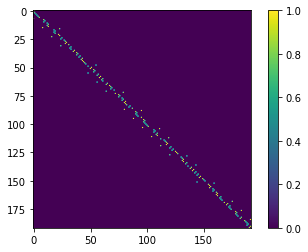

In [12]:


import numpy as np
import matplotlib.pyplot as plt

plt.imshow(Index_Matrix)
plt.colorbar()
plt.show()

In [13]:
Vij.shape

(192, 192)

In [14]:

Val=-np.linspace(-S_spin,S_spin,int(2*S_spin+1))


Coord=np.linspace(0,2*S_spin,int(2*S_spin+1))
    
Sz_sp=sparse.coo_matrix((Val,(Coord,Coord)),shape=(int(2*S_spin+1),int(2*S_spin+1)),dtype="complex") 



In [15]:
# In[ ]:


#Define Splus

Val=[]


for j in range(1,int(2*S_spin)+1):
    
    Val.append(sqrt((S_spin)*(S_spin+1)-(S_spin-j)*(S_spin+1-j)))
    

Coord=np.linspace(0,int(2*S_spin)-1,int(2*S_spin))    
Splu_sp=(sparse.coo_matrix((Val,(Coord,Coord+1)),shape=(int(2*S_spin)+1,int(2*S_spin)+1),dtype="complex")) 

Sx_sp=(Splu_sp+Splu_sp.T)/2
Sy_sp=(Splu_sp-Splu_sp.T)/(2j)


In [16]:
## Check until here

In [17]:
#Initial state |S,-S>
Init_st=(sparse.coo_matrix(([1],([Levels-1],[0])),shape=(int(2*S_spin)+1,1),dtype="complex")) 



In [18]:
Init_st.toarray()

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j]])

In [19]:

#Rotated initial state

theta_=np.pi/2

Init_st_rot=(expm(scipy.sparse.csc_matrix(-1j*(theta_)*Sy_sp))@Init_st)


Init_st_rot.toarray()

array([[ 0.125     +0.j],
       [-0.30618622+0.j],
       [ 0.48412292+0.j],
       [-0.55901699+0.j],
       [ 0.48412292+0.j],
       [-0.30618622+0.j],
       [ 0.125     +0.j]])

In [20]:
Id_Spin=scipy.sparse.identity(Levels, dtype='complex')

Zero_Spin=0*Id_Spin


def Zeeman_Popul(m_s):
    
    return sparse.coo_matrix(([1],([S_spin-m_s],[S_spin-m_s])),shape=(Levels,Levels),dtype="complex")

## Checked until here



Init_Total_rot=Init_st_rot




for j in range(Atom_cutoff-1):
    
    Init_Total_rot=kron(Init_Total_rot,Init_st_rot)

In [21]:


Init_Total_rot=coo_matrix(Init_Total_rot)  #Initial state wavefunction


In [22]:
#Init_Total_rot.todense()

In [23]:

Iden_Tensor=coo_matrix(identity((Levels)**Atom_cutoff, dtype='complex'))
Zero_Tensor=0*Iden_Tensor


In [24]:


import functools as ft
from functools import reduce

lst = Atom_cutoff*[Id_Spin]
XX = reduce(kron, lst)


In [25]:

def A_i_tensor(A_op,i_index):
    
    Array_id=Atom_cutoff*[Id_Spin] 
    
    Array_id[i_index]=A_op
    
    return reduce(kron, Array_id)

In [26]:

#Not needed, just for reference

def tensor_kjXYZ2( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idX),reduce(kron, Array_idY),reduce(kron, Array_idZ) 


In [27]:


def tensor_termIntact( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idZ)-0.5*( reduce(kron, Array_idX)+reduce(kron, Array_idY) ) 



In [28]:

#Not needed, just for reference

def tensor_kjXX( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sx_sp
    Array_id[j]=Sx_sp

    return reduce(kron, Array_id)



def tensor_kjYY( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sy_sp
    Array_id[j]=Sy_sp

    return reduce(kron, Array_id)



def tensor_kjZZ( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_sp
    Array_id[j]=Sz_sp

    return reduce(kron, Array_id)


In [29]:

Sz_cuad=Sz_sp@Sz_sp


In [30]:
Omega_y=0

In [31]:

# In[ ]:


def tensor_k_Zcuad( k ):  #Excited state k is a Position in the cluster after the G classification
    
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_cuad
        
    return reduce(kron, Array_id)


# Construct a vector with |C_i| elements equal to A_i_tensor(Sz_cuad,j)

Sz_cuad_array=Zero_Tensor


for j in range(Atom_cutoff):
    
    Sz_cuad_array+= B_Q* A_i_tensor(Sz_cuad,j)   #+ Omega_y*A_i_tensor(Sy_sp,j)
    
#Sz_cuad_array=Sz_cuad_array+ Omega_y*A_i_tensor(Sy_sp,0)  # + A_i_tensor(Sy_sp,0)

In [32]:

def Hamilt_ic(index_center):
     
    Index_list=Index_N[index_center]
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        
        for k in range(j+1,Atom_cutoff):
            
            
            IL_k   = Index_list[k]

            Ten_jk = tensor_termIntact( j , k)

            
            Hamil=Hamil+ Vij[IL_j,IL_k]*Ten_jk
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil

In [33]:

def f(t, yR,M_vect,b):

    return -1j*M_vect@yR

In [34]:
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numpy import sin, cos

T0=time.time()


# In[ ]:


Zeeman_Operators=[]

In [35]:
ListVal=[]


ValuesSpn=np.linspace(-S_spin,S_spin,int(2*S_spin+1))


ValuesSpn

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [36]:
for j in range(len(ValuesSpn)):
    
    Zeeman_Operators.append(A_i_tensor(Zeeman_Popul( ValuesSpn[j]),0))
    


# In[ ]:

In [37]:
B_Q

-1.8478

In [38]:
0.5/1000

0.0005

In [39]:
20

20

In [40]:
tspan=np.linspace(0,0.5,800)



from scipy.integrate import solve_ivp


T_init=tspan[0]

T_fin =tspan[-1]

In [41]:
tspan[1]-tspan[0]

0.0006257822277847309

In [42]:

#MACE method


from scipy.integrate import solve_ivp


def Dynam_Popul_CI(index_center):
    
    Populations=np.zeros((Levels,len(tspan)))
    

    #sol = solve_ivp(f, [tspan[0], tspan[-1]], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic(index_center),None),dense_output=True )
    sol = solve_ivp(f, [T_init, T_fin], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic(index_center),None),dense_output=True,max_step=0.0001 )

    Sol_dense=sol.sol(tspan)
    
    
    for j in range(Levels):
        
        Populations[j]=real((diag((conj(Sol_dense.T)@(Zeeman_Operators[j]@Sol_dense)))))
        
        
    return Populations

    

In [43]:

Populat_Fin=np.zeros((Levels,len(tspan)))


In [44]:

OperX=[]
OperY=[]
OperZ=[]


for j in range(Atom_cutoff):
    
    
    OperX.append( A_i_tensor(Sx_sp,j) )
    OperY.append( A_i_tensor(Sy_sp,j) )
    OperZ.append( A_i_tensor(Sz_sp,j) )
    

In [45]:
"""
VarL=(3**2)*Populat_Fin[0]
VarL=VarL+(2**2)*Populat_Fin[1]
VarL=VarL+(1**2)*Populat_Fin[2]
VarL=VarL+(0**2)*Populat_Fin[3]
VarL=VarL+((-1)**2)*Populat_Fin[4]
VarL=VarL+((-2)**2)*Populat_Fin[5]
VarL=VarL+((-3)**2)*Populat_Fin[6]

"""

'\nVarL=(3**2)*Populat_Fin[0]\nVarL=VarL+(2**2)*Populat_Fin[1]\nVarL=VarL+(1**2)*Populat_Fin[2]\nVarL=VarL+(0**2)*Populat_Fin[3]\nVarL=VarL+((-1)**2)*Populat_Fin[4]\nVarL=VarL+((-2)**2)*Populat_Fin[5]\nVarL=VarL+((-3)**2)*Populat_Fin[6]\n\n'

In [46]:

#CorrT2=N_atom*(S_spin/2-VarL)
#CorrT3=N_atom*(S_spin/2-VarL)
#CorrT4=N_atom*(S_spin/2-VarL)
#CorrT5=N_atom*(S_spin/2-VarL)
#CorrT6=S_spin/2-VarL

#(Vij@Mean_Val_XYZ)



In [47]:



number_parts=200


index_parts=int(len(tspan)/number_parts)

tnew=[]


CovZiZj_list=[]

## Covariance ZZ


for tind_ in range(len(tspan)-1):

    Time_pos=int((tind_+1)//index_parts)
    
    if (tind_+1)%index_parts==0:
        
        tnew.append(tspan[tind_+1])

tnew=array(tnew)

In [48]:


def Hamilt_ic_MACE(index_center):
     
    Index_list=Index_N[index_center]
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        
        for k in range(j+1,Atom_cutoff):
            
            
            IL_k   = Index_list[k]

            Hamil=Hamil+ Vij[IL_j,IL_k]*(tensor_termIntact( j , k) )
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil


In [49]:
#checked until here

In [50]:

# Wavefunction saving

Wave_function=np.zeros((Levels**Atom_cutoff,N_atom),dtype="complex")



for j in range(N_atom):    
    Wave_function[:,j]=Init_Total_rot.toarray().reshape(Levels**Atom_cutoff,)   #Not sparse structure because the state is not sparse

    
    
    
    
    

In [51]:

Cov_ZZ_ti=zeros((N_atom,N_atom),dtype="complex")

for iZZ in range(1,Atom_cutoff): 

    Sz0Szi=tensor_kjZZ( 0 , iZZ )
    Expect_Sz0Szi=diag(conj(Wave_function.T)@(Sz0Szi@Wave_function))

    for jZZ in range(N_atom):


        Cov_ZZ_ti[jZZ,Index_N[jZZ][iZZ]]=Expect_Sz0Szi[jZZ]


        
        
        
CovZiZj_list.append(Cov_ZZ_ti)



In [52]:
Mean_Val_XYZ=np.zeros((N_atom,3*len(tspan)),dtype="complex")
#tspan
#Vj_dot_MV_XYZ=Vij@Mean_Val_XYZ
Vj_dot_MV_XYZ=np.zeros((N_atom,3*len(tspan)),dtype="complex")




Mean_Val_XYZ_0     =np.zeros((N_atom,3),dtype="complex")
Mean_Val_XYZ_0[:,0]=diag(conj(Wave_function.T)@(OperX[0]@Wave_function))
Mean_Val_XYZ_0[:,1]=diag(conj(Wave_function.T)@(OperY[0]@Wave_function))
Mean_Val_XYZ_0[:,2]=diag(conj(Wave_function.T)@(OperZ[0]@Wave_function))
Vj_dot_MV_XYZ_0    =Vij@Mean_Val_XYZ_0

Mean_Val_XYZ[:,array([0,1,2])]=Mean_Val_XYZ_0
Vj_dot_MV_XYZ[:,array([0,1,2])]=Vj_dot_MV_XYZ_0

In [53]:
Popul_CMFT=np.zeros((int(2*S_spin+1),len(tnew)+1),dtype=complex)




In [54]:

for j in range(int(2*S_spin+1)):
    Popul_CMFT[j,0]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function))) /N_atom



In [55]:

#@jit
def Hamilt_ic_CMFT(index_center,tindector):
     
    Index_list=Index_N[index_center]
    HamilCMFT_=Zero_Tensor
    
    x_ind=0+3*tindector
    y_ind=1+3*tindector
    z_ind=2+3*tindector
    
    
    Vij_Vals_XYZ =Vj_dot_MV_XYZ[:,[x_ind,y_ind,z_ind]]
    Vals_XYZ     =Mean_Val_XYZ[:,[x_ind,y_ind,z_ind]]
    
    
    #Part_XX=Zero_Tensor
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        

        VjX,VjY,VjZ=Vij_Vals_XYZ[IL_j]
        
        hat_Sxj=OperX[j]
        hat_Syj=OperY[j]
        hat_Szj=OperZ[j]
        
        HamilCMFT_=HamilCMFT_+ (VjZ*hat_Szj - 0.5*( VjX * hat_Sxj + VjY * hat_Syj   ) )
        
        #Part_XX=Part_XX- 0.5*VjX*hat_Sxj
    
    
        for k in range(Atom_cutoff):
            
            IL_k   = Index_list[k]
                    
            sxk,syk,szk = Vals_XYZ[IL_k] 
            
            MF_termJK = szk*hat_Szj - 0.5 * ( sxk * hat_Sxj + syk * hat_Syj )
            
            HamilCMFT_=HamilCMFT_ - Vij[IL_j,IL_k]*   MF_termJK  
            
            #print(j,k,"IndexN", IL_j,IL_k)
            
            #Part_XX= Part_XX- Vij[IL_j,IL_k]*(- 0.5 *sxk*hat_Sxj)
            
    return  HamilCMFT_#, Part_XX

In [56]:

def Wave_func_part(Wave_fun_mt,inst_time):
    
    Result_fin=Wave_fun_mt
    

    for cent_ind in range(N_atom):
    
        
        #Mat_dyn=Time_ind_hamil[cent_ind]   #+Part_time_dep(cent_ind,inst_time)
        
        Mat_dyn=Hamilt_ic_MACE(cent_ind)+ Hamilt_ic_CMFT(cent_ind,inst_time)
        
        
        sol_cent_ind = solve_ivp(f,[tspan[inst_time],tspan[inst_time+1]],list(Wave_fun_mt[:,cent_ind])
                                 ,args=(Mat_dyn,None),dense_output=False,max_step=0.01)# , t_eval= [tspan[inst_time+1]])
        
        
        
        Result_fin[:,cent_ind]=((sol_cent_ind.y)[:,-1]).reshape((Levels**Atom_cutoff,))
        
        #print(cent_ind)
        #print(cent_ind/N_atom)
        
    return Result_fin


In [57]:
sz_columns=[]


sz_columns.append(diag(conj(Wave_function.T)@(OperZ[0]@Wave_function)))

In [58]:
count=0

tNEW=[0]

for tind_ in range(len(tspan)-1):
    
    Wave_function= Wave_func_part(Wave_function,tind_)
    
    
    if (tind_+1)%index_parts==0:
        count=count+1
        
        tNEW.append(tspan[tind_+1])
        
        for j in range(int(2*S_spin+1)):
            Popul_CMFT[j,count]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function)))/N_atom
        
        #Popul_CMFT[j,count]=sum(diag(conj(Wave_function.T)@(Zeeman_Operators[j]@Wave_function)))
        
        Cov_ZZ_ti=zeros((N_atom,N_atom),dtype="complex")
        
        for iZZ in range(1,Atom_cutoff): 
            
            Sz0Szi=tensor_kjZZ( 0 , iZZ )
            Expect_Sz0Szi=diag(conj(Wave_function.T)@(Sz0Szi@Wave_function))
            
            print(norm(Expect_Sz0Szi))
            
            for jZZ in range(N_atom):
                              
                Cov_ZZ_ti[jZZ,Index_N[jZZ][iZZ]]=Expect_Sz0Szi[jZZ]
        
        
        CovZiZj_list.append(Cov_ZZ_ti)
        
        ColZ=diag(conj(Wave_function.T)@(OperZ[0]@Wave_function))
        
        sz_columns.append(ColZ)
        

        #print(100*(tind_+1)/len(tspan))
        
    print((100*tind_/(len(tspan)-1)),"%")
    
    
    
    
    Mean_Val_XYZ_0     =np.zeros((N_atom,3),dtype="complex")
    Mean_Val_XYZ_0[:,0]=diag(conj(Wave_function.T)@(OperX[0]@Wave_function))
    Mean_Val_XYZ_0[:,1]=diag(conj(Wave_function.T)@(OperY[0]@Wave_function))
    Mean_Val_XYZ_0[:,2]=diag(conj(Wave_function.T)@(OperZ[0]@Wave_function))
    Vj_dot_MV_XYZ_0    =Vij@Mean_Val_XYZ_0
    
    step_time=3*(tind_+1)

    Mean_Val_XYZ[ :,step_time+array([0,1,2])]=Mean_Val_XYZ_0
    Vj_dot_MV_XYZ[:,step_time+array([0,1,2])]=Vj_dot_MV_XYZ_0
    
    #print(step_time)


0.0 %
0.1251564455569462 %
0.2503128911138924 %
0.001150037890969509
0.37546933667083854 %
0.5006257822277848 %
0.6257822277847309 %
0.7509386733416771 %
0.004599248534467038
0.8760951188986232 %
1.0012515644555695 %
1.1264080100125156 %
1.2515644555694618 %
0.010344921019715942
1.376720901126408 %
1.5018773466833542 %
1.6270337922403004 %
1.7521902377972465 %
0.018382538702602477
1.8773466833541927 %
2.002503128911139 %
2.127659574468085 %
2.252816020025031 %
0.028705784312156007
2.3779724655819776 %
2.5031289111389237 %
2.6282853566958697 %
2.753441802252816 %
0.041306547088053806
2.8785982478097623 %
3.0037546933667083 %
3.1289111389236544 %
3.254067584480601 %
0.05617493193697532
3.379224030037547 %
3.504380475594493 %
3.6295369211514394 %
3.7546933667083855 %
0.07329927059220523
3.8798498122653315 %
4.005006257822278 %
4.130162703379224 %
4.25531914893617 %
0.09266613475749269
4.380475594493117 %
4.505632040050062 %
4.630788485607009 %
4.755944931163955 %
0.11426035121282838
4.881

In [59]:
ith=0

Szith=sz_columns[ith].reshape(N_atom,1)

In [60]:
Mean_Field_CorrZZ=[]

Mean_Field_CorrZZ.append(  Szith@(Szith.T)    )

In [61]:

for ith in range(1,len(tNEW)):
    Szith=sz_columns[ith].reshape(N_atom,1)
    
    Mean_Field_CorrZZ.append(  Szith@(Szith.T)   )
    

In [71]:
## Covariance matrices ZZ

Cov_ZZ_mat=[]

for t_th in range(len(tNEW)):
    
    
    Cov_ZZ_mat.append( 0.5*(CovZiZj_list[t_th] +CovZiZj_list[t_th].T) - Index_Matrix*Mean_Field_CorrZZ[t_th]   )
    

In [73]:
CovZZ_tot=[]

for t_th in range(len(tNEW)):
    
    CovZZ_tot.append(Cov_ZZ_mat[t_th].sum())
    
    

In [77]:
import matplotlib.pyplot as plt




import matplotlib.pyplot as plt
import numpy as np
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

from numpy import conjugate as conj

from numpy import zeros

from numpy import exp

import scipy

from numpy import diff
from numpy.random import randint

In [78]:
#tms3=tms
#Popul_CMFT3=Popul_CMFT


#tms2=tms
#Popul_CMFT2=Popul_CMFT
tms=array(tNEW)*28.85/0.5



#tms4=tms
#Popul_CMFT4=Popul_CMFT

tms1=tms
#Popul_CMFT1=Popul_CMFT

#Popul_CMFT3=Popul_CMFT

In [79]:
#Popul_CMFT2MACE=Popul_CMFT

In [80]:
#Popul_CMFMF=Popul_CMFT
#Popul_ED=Popul_CMFT

In [94]:
Atom_cutoff

2

In [95]:
ms_cuad=(np.linspace(-S_spin,S_spin,2*S_spin+1))**2
#vczMF=ms_cuad@Popul_CMFT

vczC2=ms_cuad@Popul_CMFT
CovZZ_totC2=CovZZ_tot

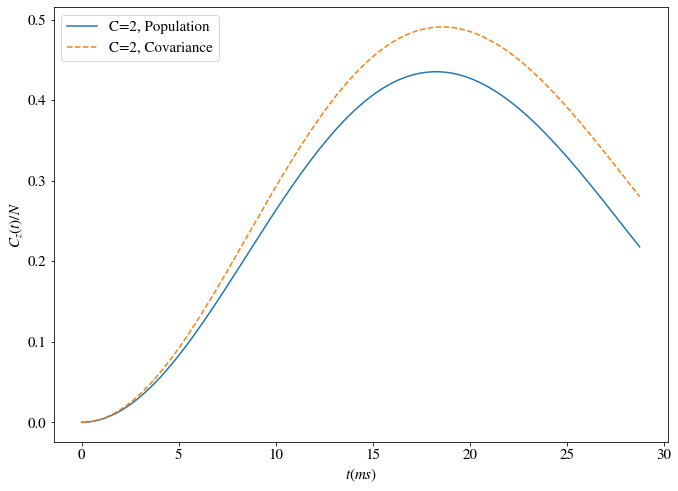

In [96]:
plt.plot(tms1,(S_spin/2-real(vczC2)),label="C=2, Population")
plt.plot(tms1,real(CovZZ_tot)/N_atom,"--",label="C=2, Covariance")


plt.xlabel("$t(ms)$")
plt.ylabel("$C_z(t)/N$")



plt.legend()

In [ ]:
for j in range(int(2*S_spin+1)):
    
    if j<4:
    
        #plt.plot(tms,real(Popul_ED[j]),"-",label=str(j)+" ED")
        plt.plot(tms1,real(Popul_CMFT[j]),"--",label="$m_S$="+str(-3+j)+" MF short")
        #plt.plot(tms1,real(MFshort[j]),"--",label="$m_S$="+str(-3+j)+" MF")
        
        #plt.plot(tms1,real(Popul_CMFT2[j]),"--",label=str(j)+" 2C")
        #plt.plot(tms1,real(Popul_CMFT2MACE[j]),".-",label=str(j)+" 2MACE")
        #plt.plot(tms1,real(Popul_ED[j]),"-",label=str(j)+" ED")
        #plt.plot(tms2[:43],real(Popul_CMFT2[j])[:43],"--",label=str(j)+" C=2")
    
        #plt.plot(tms3,real(Popul_CMFT3[j]) ,".-",label=str(j)+" C=3 ")
        #plt.plot(tms4,real(Popul_CMFT4[j]) ,".",label=str(j)+" C=4 ")
        #plt.plot(tms5[:43],real(Popul_CMFT5[j])[:43] ,"-",label=str(j)+" C=5 ")
    

#plt.xlim(0,80)
    
    
plt.xlabel("t(ms)",fontsize=20)
plt.ylabel("$\\left< m_s \\right>$",fontsize=20)
#plt.ylim(0,1)
plt.legend()

In [ ]:
#MFshort=Popul_CMFT

In [ ]:
for j in range(int(2*S_spin+1)):
    
    if j<4:
    
        #plt.plot(tms,real(Popul_ED[j]),"-",label=str(j)+" ED")
        plt.plot(tms1,real(MFshort[j]),"--",label="$m_S$="+str(-3+j)+" MF")
        #plt.plot(tms1,real(Popul_CMFT2[j]),"--",label=str(j)+" 2C")
        #plt.plot(tms1,real(Popul_CMFT2MACE[j]),".-",label=str(j)+" 2MACE")
        #plt.plot(tms1,real(Popul_ED[j]),"-",label=str(j)+" ED")
        #plt.plot(tms2[:43],real(Popul_CMFT2[j])[:43],"--",label=str(j)+" C=2")
    
        #plt.plot(tms3,real(Popul_CMFT3[j]) ,".-",label=str(j)+" C=3 ")
        #plt.plot(tms4,real(Popul_CMFT4[j]) ,".",label=str(j)+" C=4 ")
        #plt.plot(tms5[:43],real(Popul_CMFT5[j])[:43] ,"-",label=str(j)+" C=5 ")
    

#plt.xlim(0,80)
    
    
plt.xlabel("t(ms)",fontsize=20)
plt.ylabel("$\\left< m_s \\right>$",fontsize=20)
#plt.ylim(0,1)
plt.legend()

In [ ]:
np.max(real(Popul_CMFT[1]))

In [ ]:
# Vary Bq- 3.6 to 3.6

In [ ]:
S_spin

In [ ]:
N_atom

In [ ]:
B_Q

In [ ]:
Atom_cutoff

In [ ]:
tspan[-1]

In [ ]:
Vij

In [ ]:
ArXYZ=np.sum(Mean_Val_XYZ,axis=0)
Sx=[]
Sy=[]
Sz=[]

for j in range(len(tspan)):

    Sx.append(ArXYZ[3*j])
    Sy.append(ArXYZ[3*j+1])
    Sz.append(ArXYZ[3*j+2])


In [ ]:
plt.plot(tspan,real(Sx))
plt.plot(tspan,real(Sy))
plt.plot(tspan,real(Sz))

In [ ]:
Mean_Val_XYZ.shape

In [ ]:
here

In [ ]:
Omega_y

In [ ]:
def determinist(t,XYZ_list,Vij,b_):
    
    X_list  = array(XYZ_list[    0    :   N_atom])
    Y_list  = array(XYZ_list[ N_atom  : 2*N_atom])
    Z_list  = array(XYZ_list[2*N_atom : 3*N_atom])
    
    ProdX_V=X_list@Vij
    ProdY_V=Y_list@Vij
    ProdZ_V=Z_list@Vij
        
    ds_list = np.zeros(3*N_atom)
    
    ds_list[    0   :  N_atom]= -Omega_y*Z_list+0.50*Y_list*ProdZ_V+0.25*Z_list*ProdY_V
    ds_list[ N_atom :2*N_atom]= -0.50*X_list*ProdZ_V-0.25*Z_list*ProdX_V
    ds_list[2*N_atom:3*N_atom]=  Omega_y*X_list+0.25*Y_list*ProdX_V-0.25*X_list*ProdY_V
    
    return ds_list

In [ ]:
def initial_state():
    
    Total_variables=3*N_atom

    cint    = np.zeros((Total_variables))
    
    mf=1

    sxA_int       = -np.ones((N_atom,))
    syA_int       =  (np.random.randint(0,2,(N_atom,)) * 2 - 1)
    szA_int       =  (np.random.randint(0,2,(N_atom,)) * 2 - 1)
    
    cint[0*N_atom : 1*N_atom] =sxA_int
    cint[1*N_atom : 2*N_atom] =(1-mf)*syA_int
    cint[2*N_atom : 3*N_atom] =(1-mf)*szA_int
    
    return cint
    

In [ ]:
tspan[1]-tspan[0]

In [ ]:

def Trajectory():
    
    
    sol = solve_ivp(determinist, [tspan[0],tspan[-1]],  initial_state(),args=(Vij,None),dense_output=True,max_step=tspan[1]-tspan[0])
    
    Arr_sol=sol.sol(tspan)
    
    return Arr_sol

In [ ]:
MfSol=Trajectory()

In [ ]:
tspan

In [ ]:
MfSol.shape

In [ ]:
Nee=N_atom/2+0.5*np.sum(MfSol[2*N_atom::],axis=0)
Ngg=N_atom/2-0.5*np.sum(MfSol[2*N_atom::],axis=0)


In [ ]:
N_atom

In [ ]:
plt.plot(tspan*28.85/0.5,Nee/N_atom,label=str(0)+" MF")
plt.plot(tspan*28.85/0.5,Ngg/N_atom,label=str(1)+" MF Cmft")


plt.plot(tms1,real(Popul_CMFT[0]),"-",label=str(0)+" MF Cmft")

plt.plot(tms1,real(Popul_CMFT[1]),"-",label=str(1)+" MF Cmft")

plt.legend()
